
# Image Classification using Convolutional Neural Networks
## Udacity Project #2
This is my submission to Project #2 of Udacity's Deep Learning Fundation course.
On this project I created a Convolutional Neural Network (CNN) to classify images of the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) image set.

Libraries & Tools Used:
* Tensor Flow
* Jupyter Notebook
* Numpy
* Conda

Training VM:
* AWS p2.xlarge instances (GPU)

## Download the Data
On this project we classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which consists of airplanes, dogs, cats, and other objects. Before training a model we need to preprocess the images and then train a convolutional neural network on all the samples. The images are normalized and the labels are one-hot encoded.  For the model I added convolutional, max pooling, dropout, and fully connected layers.
[CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
#from urllib.request import urlretrieve
from six.moves import urllib
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
from mock import MagicMock
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urllib.request.urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## CIFAR-10 Data Set
The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 6:
Image - Min Value: 7 Max Value: 249
Image - Shape: (32, 32, 3)
Label - Label Id: 2 Name: bird


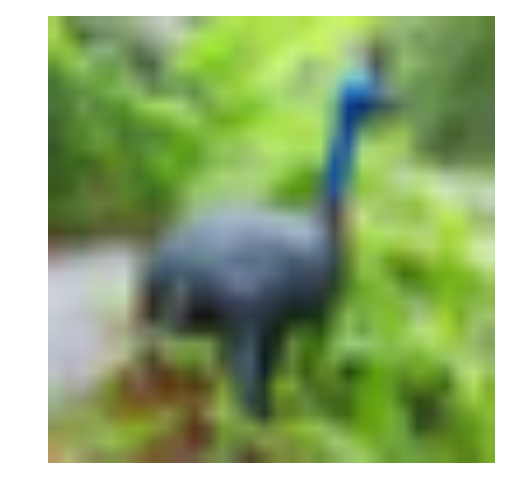

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Dataset Example
batch_id = 1
sample_id = 6
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Preprocess Functions
### Normalize
This is the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values are in the range of 0 to 1, inclusive.  The return object is the same shape as `x`.

In [3]:
def normalize(data):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # Convert all data to Float32 in preparation for normalization
    data = data.astype('float32')
    # Check is data is Not Normalized before attempting normalization
    if data.max() > 1.0:
        # divide by 255 to normalize
        data/=255.0
    return data


"""
Function Test
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Implementation of the `one_hot_encode` function. The input, `x`, are a list of labels.  The function return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9.

In [4]:
def one_hot_encode(labelsArray, total_lbs=10):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # Array of zeros with the given shape (rows, columns)
    # Rows (x) = numpyArray.shape[0]
    # Columns (y) = total_lbs (Total Labels)
    result = np.zeros((len(labelsArray), total_lbs))
    
    # set the number 1 to the position specified by numpyArray
    # for every row (x) and column (value of numpyArray)
    # Effectively creating a matrix with #1 on the position of the label
    result[np.arange(len(labelsArray)), labelsArray] = 1
    return result

"""
Function Test
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


## Preprocess all the data and save it
Preprocess all the CIFAR-10 data and save it to file. 10% of the training data is used for validation.

In [5]:
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [6]:
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

# Build the network
For the neural network, each layer is built into a function.

### Input
Read the image data, one-hot encoded labels, and dropout keep probability. 

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    return tf.placeholder(tf.float32, [None, image_shape[0],image_shape[1],image_shape[2]], name = 'x')

def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(tf.float32, [None, n_classes], name = 'y')

def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(tf.float32, name = "keep_prob")

"""
Function Tests
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # Weight and bias
    x = x_tensor.get_shape().as_list()
    weight = tf.Variable(tf.random_normal([conv_ksize[0], conv_ksize[1], x[3], conv_num_outputs], stddev=5e-2, mean=0.01))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    conv1 = tf.nn.conv2d(x_tensor, weight, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    conv1 = tf.nn.bias_add(conv1, bias)
    
    # Batch Normalization Tech. to normalize output of every conv layer
    conv1 = tf.contrib.layers.batch_norm(conv1, center=True, scale=True)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, pool_ksize[0], pool_ksize[1], 1], strides=[1, pool_strides[0], pool_strides[1], 1], padding='SAME')
    return conv1

"""
Function Test
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output is of shape (*Batch Size*, *Flattened Image Size*).

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # Get the Shape of the Tensor 
    x=x_tensor.get_shape().as_list()
    
    # Multiply dimensions and reshape infering
    fc1 = tf.reshape(x_tensor, [-1,x[1]*x[2]*x[3]])
    return fc1 

"""
Function Test
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
`fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*).

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # Get the Shape of the Tensor
    x = x_tensor.get_shape().as_list()

    # Create Weights and Bias using tensor shape and outputs
    weight = tf.Variable(tf.truncated_normal([x[1], num_outputs], stddev=5e-2, mean=0.01))
    bias = tf.Variable(tf.zeros(num_outputs))

    # Multiply and Add Bias and Activation
    return tf.nn.relu(tf.add(tf.matmul(x_tensor, weight), bias))

"""
Function Test
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
`output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*).

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # Get the Shape of the Tensor
    x = x_tensor.get_shape().as_list()
    
    # Create Weights and Bias using tensor shape and outputs
    weight = tf.Variable(tf.truncated_normal([x[1], num_outputs]))
    bias = tf.Variable(tf.zeros(num_outputs))
    
    # Output Layer - class prediction 
    out = tf.add(tf.matmul(x_tensor, weight), bias)
    return out

"""
Function Test
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
`conv_net` function to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv1 = conv2d_maxpool(x, 32, (5,5), (1,1), (3,3), (2,2))
    conv2 = conv2d_maxpool(conv1, 64, (5,5), (1,1), (3,3), (2,2))
    conv2 = conv2d_maxpool(conv1, 128, (5,5), (1,1), (3,3), (2,2))
    
    #   flatten(x_tensor)
    conv2_f = flatten(conv2)

    #   fully_conn(x_tensor, num_outputs)
    fc1 = fully_conn(conv2_f, 512)
    fc2 = fully_conn(fc1, 1024)

    #   output(x_tensor, num_outputs)
    ol1 = output(fc2, 10)

    # Added Dropout after output layer; tried it before other layer
    # but the network died.
    do = tf.nn.dropout(ol1, keep_prob)
    
    return do

"""
Function Test
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(1e-4).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
`train_neural_network` function to do a single optimization.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})
    
"""
Function Test
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
`print_stats` function to print loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # Calculate batch loss and accuracy
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.})
    valid_acc = session.run(accuracy, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.})

    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss,valid_acc))

### Hyperparameters
Parameters to Tune:

In [15]:
# Tune Parameters
epochs = 100
batch_size = 128
keep_probability = 0.5

### Fully Train the Model
Train the model using all five batches.

In [17]:
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print 'Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i),
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:   Loss:   294.7390 Validation Accuracy: 0.120600
Epoch  1, CIFAR-10 Batch 2:   Loss:   237.4984 Validation Accuracy: 0.123800
Epoch  1, CIFAR-10 Batch 3:   Loss:   315.7806 Validation Accuracy: 0.158200
Epoch  1, CIFAR-10 Batch 4:   Loss:   245.9000 Validation Accuracy: 0.164000
Epoch  1, CIFAR-10 Batch 5:   Loss:   166.6379 Validation Accuracy: 0.158400
Epoch  2, CIFAR-10 Batch 1:   Loss:   223.1537 Validation Accuracy: 0.189400
Epoch  2, CIFAR-10 Batch 2:   Loss:   139.2504 Validation Accuracy: 0.172200
Epoch  2, CIFAR-10 Batch 3:   Loss:   275.9665 Validation Accuracy: 0.173000
Epoch  2, CIFAR-10 Batch 4:   Loss:    75.9266 Validation Accuracy: 0.216800
Epoch  2, CIFAR-10 Batch 5:   Loss:   286.8834 Validation Accuracy: 0.188000
Epoch  3, CIFAR-10 Batch 1:   Loss:   150.7277 Validation Accuracy: 0.201400
Epoch  3, CIFAR-10 Batch 2:   Loss:    88.5217 Validation Accuracy: 0.182600
Epoch  3, CIFAR-10 Batch 3:   Loss:    67.1164 Validation Accura

## Test Model
Tune Hyperparameters and Test your model against the test dataset, until accuracy is greater than 50%. 

Testing Accuracy: 0.612836234177



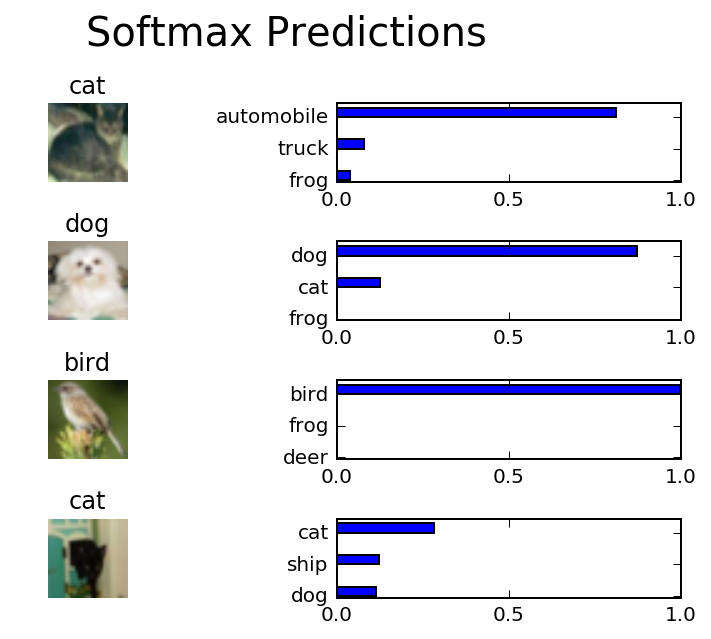

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()